This note book would use a the twitter data collected with a foucs on covid-19 in US, this notebook would used the pre-processed twitter data on textblob<br>
This notebook would filter out the tweets with regex on family and covid<br>
We would the Topic modeling visualization to visualize the tweets major topics as well as the frequency<br>
reference: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document<br>
refernece:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#4whatdoesldado

In [1]:
#import package needed
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from pprint import pprint
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#ntlk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#word cloud 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

#the bar chart
from collections import Counter

C:\Software\Anaconda\Software\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#import the datasert
total_df = pd.read_csv('Data_Source/tweet_df_loc_sentiment.csv',low_memory=False,lineterminator='\n')
del total_df['Unnamed: 0']
#shrink the data to US only and make the processed data in to a list
total_df = total_df[total_df['country_code']=='US']

In [3]:
#use regex to clean and filter out the useful info from tweets related to family 
#also filter out the word related to us election
regex_election = re.compile(r'(?i)Trump|Biden|Election|democratic|republican|party|President|campaign|elector|candidate') #party can be party or political party
regex_family = re.compile(r'(?i)sister|brother|mother|father|grandpa|grandma|grandparents|grandmother|grandfather|cousin|child|dad|mom|uncle|aunt|nephew|niece|son|daughter|relative|cousin|parents|husband|wife|family')
regex_covid = re.compile(r'(?i)corona|covid|virus|pandemic|epidemic|quarantine|lockdown|social distancing|isolation|mask|infectious|formite|vanccine|vaccination')


def covid_related_text(text):
    if regex_covid.search(text):
        return True
    return False

def family_related_text(text):
    if regex_family.search(text):
        return True
    return False

def election_related_text(text):
    if regex_election.search(text):
        return True
    return False

total_df['election_related'] = total_df['processed_text'].apply(election_related_text)
total_df['covid_related'] = total_df['processed_text'].apply(covid_related_text)
total_df['family_related'] = total_df['processed_text'].apply(family_related_text)


In [4]:
total_df.head(3)

,created_at,text,id_x,geo_id,full_name,place_type,country_code,country,geo_y,name,...,Latitude,day_index,week_index,processed_text,text_subjectivity_value,text_polarity_value,text_polarity,election_related,covid_related,family_related
38,2020-03-19T19:52:30.000Z,fuck corona i miss my boyfriend,1240727871095631872,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,37.269176,1,0,fuck corona i miss my boyfriend,0.6,-0.4,Negative,False,True,False
39,2020-03-19T20:45:44.000Z,@realDonaldTrump is a POS! https://t.co/3AswTG...,1240741265064341505,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,37.269176,1,0,is a POS!,0.0,0.0,Neutral,False,False,False
40,2020-03-19T21:01:51.000Z,You know what we all need during this Corona o...,1240745322952790016,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,37.269176,1,0,You know what we all need during this Corona o...,0.0,0.0,Neutral,False,True,False


In [9]:
#save the file for later use
total_df.to_csv("Data_Source/us_tweets_regex_sentiment.csv")

In [5]:
covid_related_df= total_df[(total_df["covid_related"]==True)&(total_df["election_related"]==False)]
family_covid_related_df = covid_related_df[covid_related_df["family_related"]==True]

Visualize the analysis on Sentiments

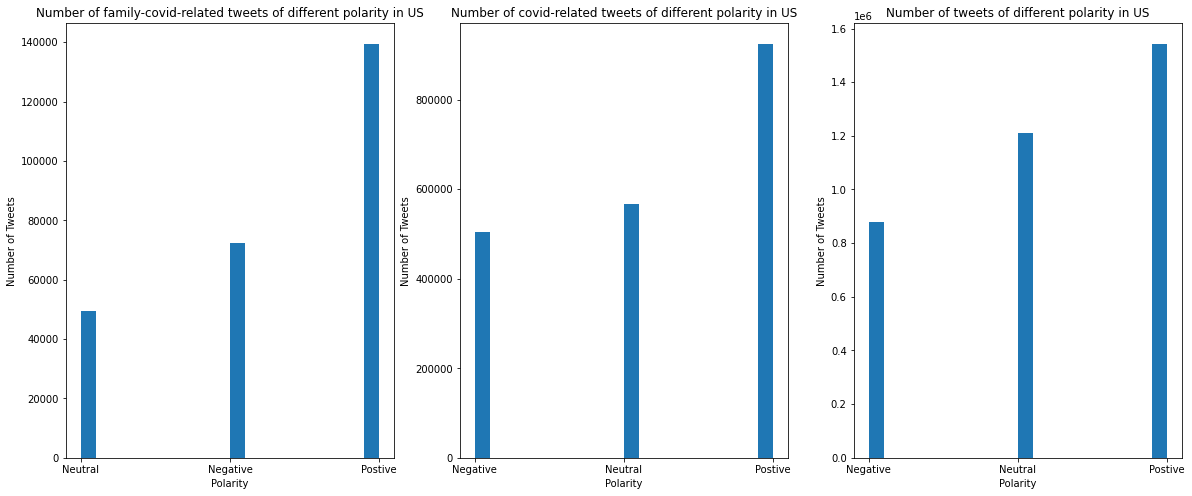

In [6]:
#draw the scatter plot
plt.figure(figsize=(20,8))
ax1 =plt.subplot(1,3,1)
ax1 =plt.hist(family_covid_related_df['text_polarity'],bins =20)
ax1 =plt.xlabel('Polarity')
ax1 =plt.ylabel('Number of Tweets')
ax1 =plt.title('Number of family-covid-related tweets of different polarity in US')
ax2 = plt.subplot(1,3,2)
ax2 =plt.hist(covid_related_df['text_polarity'],bins =20)
ax2 =plt.xlabel('Polarity')
ax2 =plt.ylabel('Number of Tweets')
ax2 =plt.title('Number of covid-related tweets of different polarity in US')
ax3 = plt.subplot(1,3,3)
ax3 =plt.hist(total_df['text_polarity'],bins =20)
ax3 =plt.xlabel('Polarity')
ax3 =plt.ylabel('Number of Tweets')
ax3 =plt.title('Number of tweets of different polarity in US')


visual the change in the average of sentiments in line graph for the situation of family-covid-related tweets,covid-related tweets,and all tweets

In [7]:
average_sentiments_weekly = pd.DataFrame()

for i in range(0,50):
    current_df = total_df[total_df['week_index']==i]
    current_family_covid_related_df = family_covid_related_df[family_covid_related_df['week_index']==i]
    current_covid_related_df = covid_related_df[covid_related_df['week_index']==i]
    average_sentiments_weekly = average_sentiments_weekly.append(pd.Series([int(i), current_df['text_polarity_value'].mean(),current_covid_related_df['text_polarity_value'].mean(),current_family_covid_related_df['text_polarity_value'].mean()]), ignore_index=True)
average_sentiments_weekly.columns = ['week_index', 'avg_polarity', 'covid_related_avg_polarity','family_covid_related_avg_polarity']    

In [8]:
average_sentiments_weekly.head(3)

,week_index,avg_polarity,covid_related_avg_polarity,family_covid_related_avg_polarity
0,0.0,0.034795,0.039250,0.056079
1,1.0,0.040706,0.042112,0.059514
2,2.0,0.041830,0.042577,0.061674


Text(0.5, 1.0, 'weekly average of polarity of tweets in US')

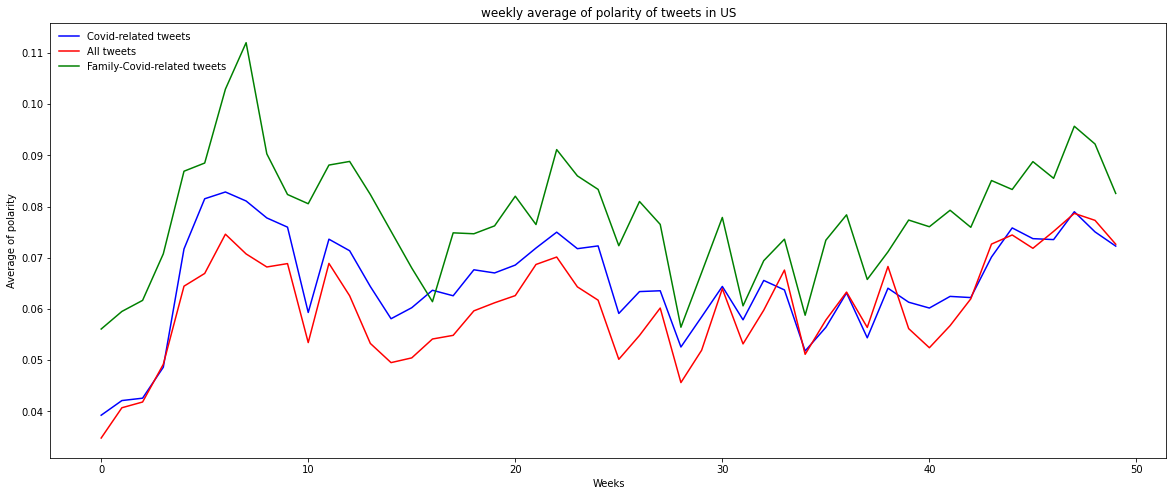

In [9]:
#draw the line graph
plt.figure(figsize=(20,8))
plt.plot(average_sentiments_weekly['week_index'],average_sentiments_weekly['covid_related_avg_polarity'],'b')
plt.plot(average_sentiments_weekly['week_index'],average_sentiments_weekly['avg_polarity'],'r')
plt.plot(average_sentiments_weekly['week_index'],average_sentiments_weekly['family_covid_related_avg_polarity'],'g')
plt.xlabel('Weeks')
plt.ylabel('Average of polarity')
plt.legend(['Covid-related tweets','All tweets','Family-Covid-related tweets'],loc = 2,frameon =False)
plt.title('weekly average of polarity of tweets in US')

Using the Topic modeling visualization<br>
In this part, we focus on the family-covid-related tweets

In [6]:
#process the pre-processed text into the phrases
def process_to_phrase(string):
    return gensim.utils.simple_preprocess(str(string), deacc=True)

family_covid_related_df['processed_text_phrase'] = family_covid_related_df['processed_text'].apply(process_to_phrase)

C:\Software\Anaconda\Software\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
family_covid_related_df.head(3)

,created_at,text,id_x,geo_id,full_name,place_type,country_code,country,geo_y,name,...,day_index,week_index,processed_text,text_subjectivity_value,text_polarity_value,text_polarity,election_related,covid_related,family_related,processed_text_phrase
43,2020-03-19T22:05:28.000Z,They think my sister has Corona 👀,1240761334205014016,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,1,0,They think my sister has Corona,0.000000,0.000000,Neutral,False,True,True,"[they, think, my, sister, has, corona]"
57,2020-03-20T01:12:17.000Z,It’s a sad day 😔 my mom was suppose to see her...,1240808345373560833,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,1,0,It’s a sad day my mom was suppose to see her ...,0.608333,-0.013542,Negative,False,True,True,"[it, sad, day, my, mom, was, suppose, to, see,..."
64,2020-03-20T03:25:20.000Z,Did I really just hear my mom say \n“You got c...,1240841827290198018,fbd6d2f5a4e4a15e,"California, USA",admin,US,Etats-Unis,"{'type': 'Feature', 'bbox': [-124.482003, 32.5...",California,...,1,0,Did I really just hear my mom say “You got coc...,0.550000,-0.375000,Negative,False,True,True,"[did, really, just, hear, my, mom, say, you, g..."


In [8]:
#convert the processed phrases list to a data list 
covid_family_phrase_data = family_covid_related_df['processed_text_phrase'].values.tolist()

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(covid_family_phrase_data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[covid_family_phrase_data], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
#Remove Stopwords, Form Bigrams, Trigrams and Lemmatization for phrase list

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(covid_family_phrase_data)  # processed Text Data

In [11]:
# Create Dictionary for all word as dictionary with different id
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

Compute the coherence score for each number of topics

In [58]:
# use the for loop to find out the best number of topics to use for the highest coherence number
topic_num_coherence_df = pd.DataFrame()
for i in range(3,12):
    topic_num = i
    print("Number of Topics:",topic_num)
    temp_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_num, 
                                           update_every=1,
                                           random_state=50,
                                           passes=20,
                                           per_word_topics=True)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=temp_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #attach to the data frame
    topic_num_coherence_df = topic_num_coherence_df.append(pd.Series([int(i),coherence_lda]), ignore_index=True)
    
    print('\nCoherence Score: ', coherence_lda)

topic_num_coherence_df.columns = ['Topics_Num', 'Coherence_score']

Number of Topics: 3

Coherence Score:  0.2970509580552346
Number of Topics: 4

Coherence Score:  0.32129694079945686
Number of Topics: 5

Coherence Score:  0.3608477161985541
Number of Topics: 6

Coherence Score:  0.3293199785653666
Number of Topics: 7

Coherence Score:  0.3751772703096669
Number of Topics: 8

Coherence Score:  0.3634193897497149
Number of Topics: 9

Coherence Score:  0.3538748821733575
Number of Topics: 10

Coherence Score:  0.35276723952918565
Number of Topics: 11

Coherence Score:  0.3791332176652183


Text(0.5, 1.0, 'Determine the optimal number of Topics')

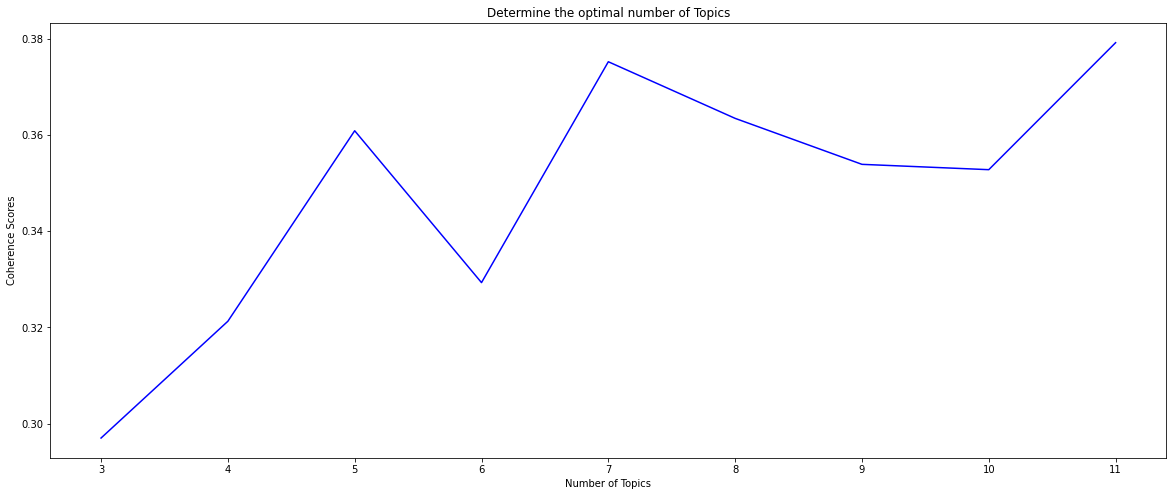

In [59]:
#visualize the score and number of Topics
plt.figure(figsize=(20,8))
plt.plot(topic_num_coherence_df['Topics_Num'],topic_num_coherence_df['Coherence_score'],'b')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.title('Determine the optimal number of Topics')


In [12]:
#create the lda model
topic_num = 7 
lda_model_7 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_num, 
                                           update_every=1,
                                           random_state=50,
                                           passes=20,
                                           per_word_topics=True)


In [13]:
#print out the topic words
pprint(lda_model_7.print_topics())

[(0,
  '0.053*"mask" + 0.047*"covid" + 0.039*"wear" + 0.024*"test" + 0.022*"family" '
  '+ 0.015*"positive" + 0.013*"person" + 0.013*"stay" + 0.013*"member" + '
  '0.012*"home"'),
 (1,
  '0.052*"vaccine" + 0.042*"covid" + 0.034*"people" + 0.024*"person" + '
  '0.016*"reason" + 0.014*"die" + 0.013*"pandemic" + 0.009*"death" + '
  '0.009*"child" + 0.009*"virus"'),
 (2,
  '0.066*"family" + 0.032*"covid" + 0.027*"friend" + 0.024*"amp" + '
  '0.023*"lose" + 0.022*"pandemic" + 0.022*"help" + 0.015*"work" + '
  '0.014*"love" + 0.014*"hard"'),
 (3,
  '0.031*"covid" + 0.031*"mom" + 0.028*"year" + 0.020*"day" + 0.016*"old" + '
  '0.015*"dad" + 0.015*"last" + 0.013*"today" + 0.012*"week" + 0.012*"wife"'),
 (4,
  '0.047*"season" + 0.025*"pandemic" + 0.023*"covid" + 0.022*"year" + '
  '0.020*"time" + 0.014*"game" + 0.014*"play" + 0.011*"team" + 0.011*"happy" + '
  '0.011*"week"'),
 (5,
  '0.050*"school" + 0.045*"parent" + 0.033*"kid" + 0.029*"pandemic" + '
  '0.026*"child" + 0.021*"teacher" + 0.019

In [24]:
#visualize the model and save to html
lda_display_7 = pyLDAvis.gensim_models.prepare(lda_model_7, corpus, id2word, sort_topics=False, mds='mmds')
pyLDAvis.save_html(lda_display_7, "Sentiment_Analysis\covid_family_related_7_topics.html")
# pyLDAvis.display(lda_display_7)

C:\Software\Anaconda\Software\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [15]:
#create the lda model
topic_num = 5 
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_num, 
                                           update_every=1,
                                           random_state=50,
                                           passes=20,
                                           per_word_topics=True)

In [16]:
#print out the topic words
pprint(lda_model_5.print_topics())

[(0,
  '0.047*"mask" + 0.034*"wear" + 0.028*"covid" + 0.022*"person" + 0.014*"amp" '
  '+ 0.010*"case" + 0.009*"family" + 0.008*"school" + 0.008*"state" + '
  '0.008*"health"'),
 (1,
  '0.040*"vaccine" + 0.031*"covid" + 0.027*"people" + 0.021*"pandemic" + '
  '0.017*"person" + 0.014*"reason" + 0.010*"die" + 0.010*"child" + '
  '0.008*"still" + 0.007*"virus"'),
 (2,
  '0.040*"family" + 0.032*"pandemic" + 0.026*"amp" + 0.024*"parent" + '
  '0.023*"lose" + 0.019*"covid" + 0.018*"school" + 0.017*"kid" + 0.017*"help" '
  '+ 0.016*"friend"'),
 (3,
  '0.048*"covid" + 0.025*"mom" + 0.021*"day" + 0.019*"test" + 0.016*"year" + '
  '0.013*"today" + 0.013*"week" + 0.013*"wife" + 0.013*"old" + 0.012*"family"'),
 (4,
  '0.037*"season" + 0.025*"pandemic" + 0.021*"year" + 0.018*"time" + '
  '0.017*"covid" + 0.011*"game" + 0.011*"watch" + 0.011*"play" + 0.009*"last" '
  '+ 0.009*"week"')]


In [25]:
#visualize the model
lda_display_5 = pyLDAvis.gensim_models.prepare(lda_model_5, corpus, id2word, sort_topics=False, mds='mmds')
pyLDAvis.save_html(lda_display_5, "Sentiment_Analysis\covid_family_related_5_topics.html")
# pyLDAvis.display(lda_display_5)

The number of 4 topics looks good as the circle of the topic are not overlapping now<br>
Establish the wordcloud for the 4 topics

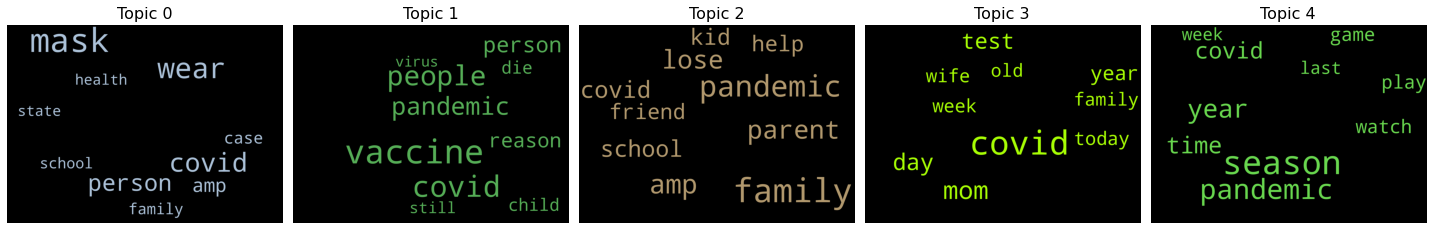

In [19]:
#get the colors
cols = [color for name, color in mcolors.XKCD_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_5.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Establish the word count and the the weight of each word in each topic<br>
visualize the weigh and count of Each word in each of the topic 

<ipython-input-20-730c7b235abd>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


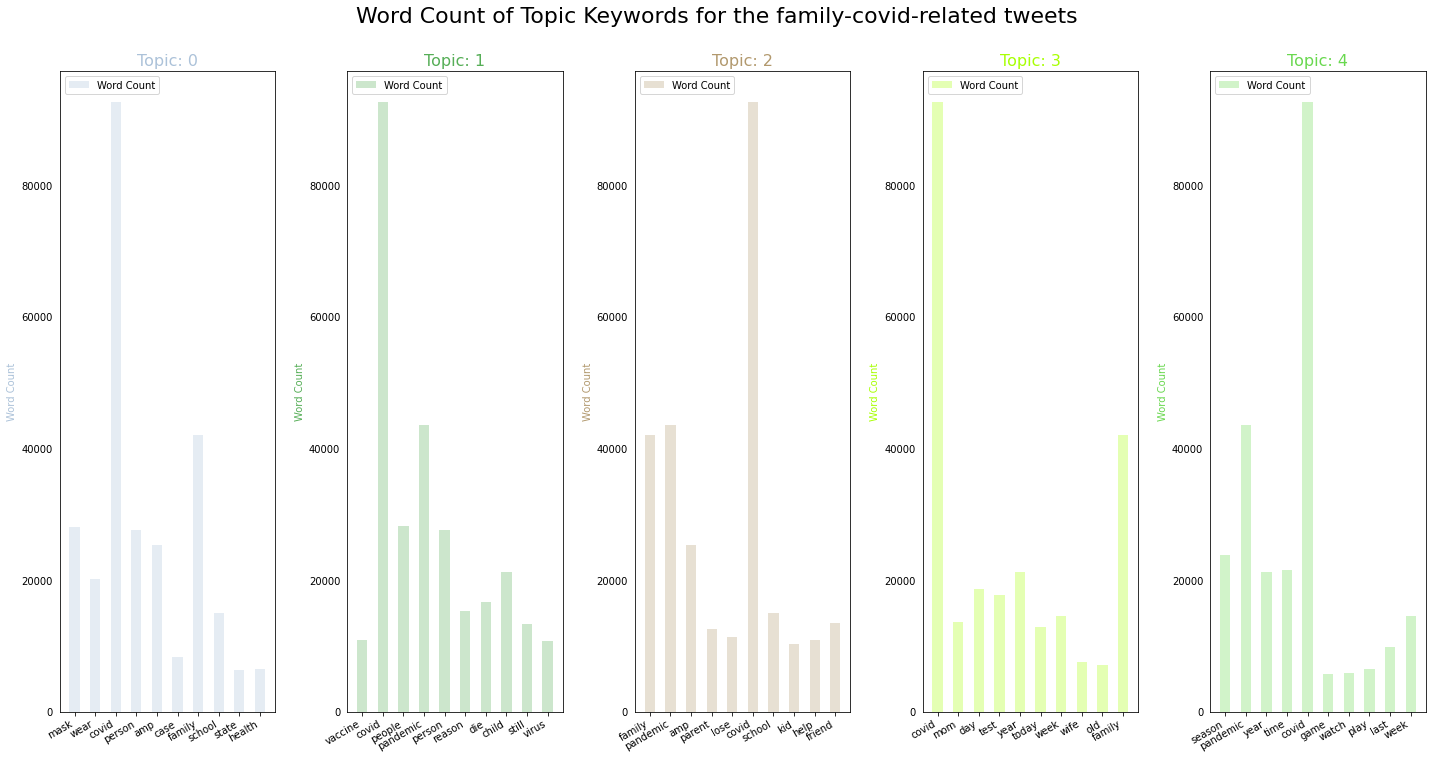

In [20]:
topics = lda_model_5.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])


fig, axes = plt.subplots(1,5, figsize=(20,10), sharey=False )

cols = [color for name, color in mcolors.XKCD_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); #ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count of Topic Keywords for the family-covid-related tweets', fontsize=22, y=1.05)    
plt.show()

<ipython-input-21-a1c17cdd1097>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


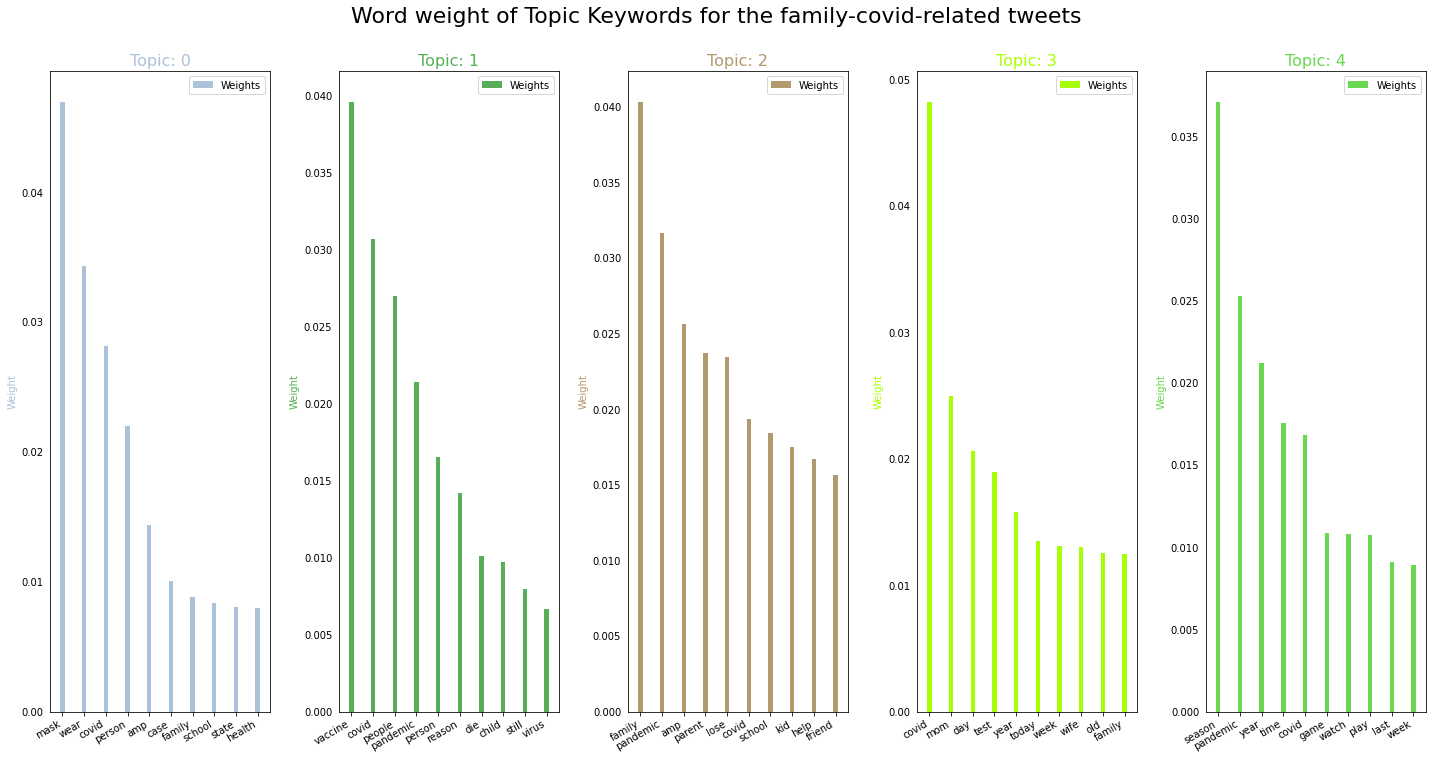

In [21]:
fig, axes = plt.subplots(1,5, figsize=(20,10), sharey=False )

cols = [color for name, color in mcolors.XKCD_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Weight', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word weight of Topic Keywords for the family-covid-related tweets', fontsize=22, y=1.05)    
plt.show()

get the dominant topic and its percentage contribution in each document

In [22]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_5, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Contribution', 'Keywords', 'Text']

In [23]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Contribution,Keywords,Text
0,0,0.0,0.2000,"mask, wear, covid, person, amp, case, family, ...",[]
1,1,3.0,0.6198,"covid, mom, day, test, year, today, week, wife...","[sad, day, mom, suppose, mom, year, tomorrow, ..."
2,2,1.0,0.4980,"vaccine, covid, people, pandemic, person, reas...","[really, hear, mom, cock, block, corona, hate]"
3,3,4.0,0.6225,"season, pandemic, year, time, covid, game, wat...","[fck, bitch, name, suppose, man, weekend]"
4,4,1.0,0.5481,"vaccine, covid, people, pandemic, person, reas...","[convince, wife, sex, well, chance, fight, cor..."
...,...,...,...,...,...
261300,261300,1.0,0.5268,"vaccine, covid, people, pandemic, person, reas...","[prison, else, lockdown]"
261301,261301,1.0,0.8438,"vaccine, covid, people, pandemic, person, reas...","[gettiodollar, yourhome, call, away, eastonma]"
261302,261302,4.0,0.7080,"season, pandemic, year, time, covid, game, wat...","[already, pretty, lonely, move, hemet, mile, r..."
261303,261303,3.0,0.9196,"covid, mom, day, test, year, today, week, wife...","[baby, sick, week, test, yesterday, mom, never..."


Focus on the the negative tweets within the 